# CS9670 Assignment 4: Frozen Lake via MCTS

This notebook provides the results for two experiments involving agents following a Monte Carlo Tree Search policy in the openAI FrozenLake 8x8 environment.

## Setup

In [1]:
import gym
import matplotlib.pyplot as plt
from mcts import *

In [2]:
env = gym.make('FrozenLake8x8-v0', is_slippery=False)

## 1) MCTS with default reward function

In this experiment, we learn the FrozenLake 8x8 environment using deterministic actions (is_slippery=False), and with the environments sparse reward function of 0 for reaching any state expect the goal which returns a reward of 1.

In [3]:
tree = MCTS(env, c=3)

num_episodes = 10000
n_avg = 100
rolling_avg = []
episode_rewards = [] 

for i_episode in range(num_episodes):
    reward = tree.traverse()
    episode_rewards.append(reward)
    if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))
    
    if i_episode % (num_episodes/10) == 0:
        print("Episode " + str(i_episode) + ": " + str(reward))

Episode 0: 0.0
Episode 1000: 0.0
Episode 2000: 0.0
Episode 3000: 1.0
Episode 4000: 1.0
Episode 5000: 1.0
Episode 6000: 1.0
Episode 7000: 1.0
Episode 8000: 1.0
Episode 9000: 1.0


Below we plot the rolling average of the total reward our agent recieved from following this policy for 10,000 episodes and find that the agent solves the environment around the 2000 episode mark.

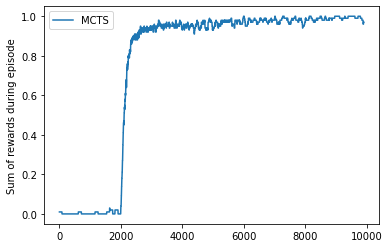

In [4]:
plt.plot(rolling_avg, label='MCTS')
plt.ylabel('Sum of rewards during episode')
plt.legend()
plt.savefig('Figures/MTCS.png')
plt.show()

We now render a single run through the environment to visualize the agent's chosen path which unsurprisingly is full of wasted steps. This is due to the environment not penalizing the agent for wasting steps. In our next experiment we will modify the environment's reward function to see if we can motivate the agent to find a more efficient path.

In [5]:
tree.traverse(render=True)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHF

1.0

## 2) MCTS with modified reward function

In this experiment, we learn the FrozenLake 8x8 environment using deterministic actions (is_slippery=False), and with a modified reward function where each step is penialized with a -0.01 and the goal provides a postive reward of +10. The purpose of this experiment to confirm that the randomness of the previous agent's actions from the first experiment are due to the sparsness of the environment's rewards and not a mistake in the algorithm's implementation. 

In [6]:
tree_cheating = MCTS(env, c=3, cheating=True)

num_episodes = 10000
n_avg = 100
rolling_avg_cheating = []
episode_rewards_cheating = [] 

for i_episode in range(num_episodes):
    reward = tree_cheating.traverse()
    episode_rewards_cheating.append(reward)
    if i_episode > n_avg:
            rolling_avg_cheating.append(np.mean(episode_rewards_cheating[-n_avg:]))
    
    if i_episode % (num_episodes/10) == 0:
        print("Episode " + str(i_episode) + ": " + str(reward))

Episode 0: -0.23000000000000007
Episode 1000: -0.24000000000000007
Episode 2000: -0.05
Episode 3000: 9.86
Episode 4000: 9.86
Episode 5000: 9.86
Episode 6000: 9.86
Episode 7000: 9.86
Episode 8000: 9.86
Episode 9000: 9.86


Once again, we plot the rolling average over 10,000 and see that the agent once again learns the environment in about 2000 steps.

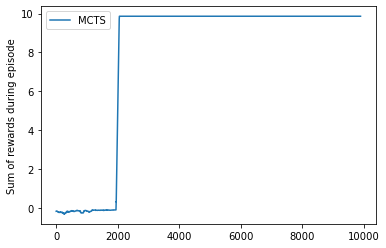

In [7]:
plt.plot(rolling_avg_cheating, label='MCTS')
plt.ylabel('Sum of rewards during episode')
plt.legend()
plt.savefig('Figures/MTCS_Cheating.png')
plt.show()

Finally, we observe the behaviour of this agent and find that a more direct path was indeed chosen.

In [8]:
tree_cheating.traverse(render=True)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF

9.86